In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt

tickers = ['AAPL', 'AMZN', 'TSLA', 'NFLX', 'BHC', 'ABBV', 'FB']

           #, 'AMD', 'SPY', 'GOOG', 'T', 'BAC', 'AVGO',
           #'COG', 'CERN', 'CSCO', 'KO', 'FANG', 'ETFC', 'EA', 'FB', 'HOG', 'HD', 'INTU', 'IVZ', 'MA', 'MCD', 'MU', 
           #'NDAQ', 'NKE', 'ORCL', 'PEP', 'QCOM', 'SNAP', 'TWTR', 'TRIP', 'UA', 'VZ', 'V', 'XRX']

stock_cp = pd.DataFrame()
attempts = 0
successful_tickers = []

while len(tickers) != 0 and attempts <= 5:
    tickers = [j for j in tickers if j not in successful_tickers]
    for i in range(len(tickers)):
        try:
            temp = pdr.get_data_yahoo(tickers[i], dt.date.today() - dt.timedelta(3650), dt.date.today())
            temp.dropna(inplace = True)
            stock_cp[tickers[i]] = temp['Adj Close']
            successful_tickers.append(tickers[i])
        except:
            print(tickers[i], 'failed to extract data.... retrying.')
            continue
    attempts += 1
    stock_cp.fillna(axis = 0, method = 'backfill', inplace = True)
    #axis = 0 means operation is performed on the columns an axis = 1 means operation is performed on the rows
    #inplace takes a bool: if True then the initial data values are changed if False then only for showing no change in real data.
    stock_cp.dropna(axis = 0, inplace = False)
    
    # statistics of our data: mean, median, standard deviation(std function).
    # default axis is 0
    stock_cp.mean()
    stock_cp.median()
    stock_cp.std()
    
    # IMP daily return
    daily_return = stock_cp.pct_change()
    daily_return.mean()
    daily_return.std()
    
    #rolling averages are the SMA's nad EMA's
    #rolling has a min_periods for less nan values but not really accurate
    daily_return.rolling(window = 20).mean()
    daily_return.rolling(window = 20).std()
    daily_return.ewm(span = 20)
    
    #to plot the whole dataframe
    stock_cp.plot()
    #standardisation of the data z-score
    stock_cp_standardized = (stock_cp - stock_cp_mean())/stock_cp.std()
    stock_cp_standardized.plot()
    #subplots for each individual stocks if we have a dataframe we dont need pyplot
    stock_cp.plot(subplots = True, figsize = (10, 30), title = 'stock proce history')
    #now pyplot from matplotlib when we dont have pandas dataframe we may have numpy 
    fig, ax = plt.subplots()
    plt.style.use('ggplot')
    ax.set(title = 'Daily Return On Tech Stocks', xlabel = 'Tech Stocks', ylabel = 'Daily Averge Return')
    plt.bar(daily_return.columns, daily_return.mean())
    
    

ModuleNotFoundError: No module named 'pandas_datareader'

<Container object of 7 artists>

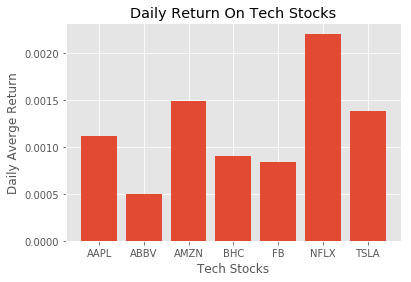

In [81]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.style.use('ggplot')
ax.set(title = 'Daily Return On Tech Stocks', xlabel = 'Tech Stocks', ylabel = 'Daily Averge Return')
plt.bar(stock_cp.pct_change().columns, stock_cp.pct_change().mean())

In [ ]:
from yahoofinancials import YahooFinancials
import pandas as pd
import datetime as dt
import pandas_datareader.data as pdr

tickers = ['AAPL', 'AMZN', 'TSLA', 'CSCO', 'NFLX', 'MSFT']

close_prices = pd.DataFrame()
end_date = (dt.date.today()).strftime('%Y-%m-%d')
beg_date = (dt.date.today() - dt.timedelta(365)).strftime('%Y-%m-%d')

temp_tickers = tickers
attempts = 0
successful_tickers = []

while len(temp_tickers) != 0 and attempts < 5:
    temp_tickers = [j for j in tickers if j not in successful_tickers]
    for i in range(len(temp_tickers)):
        try:
            yahoo_financials = YahooFinancials(temp_tickers[i])
            historical_stock_prices_json = yahoo_financials.get_historical_price_data(beg_date, end_date, 'daily')
            ohlv = historical_stock_prices_json[temp_tickers[i]]['prices']
            temp = pd.DataFrame(ohlv)[['formatted_date', 'adjclose']]
            temp.set_index('formatted_date', inplace = True)
            temp2 = temp[~temp.index.duplicated(keep = 'first')]
            close_prices[temp_tickers[i]] = temp2['adjclose']
            successful_tickers.append(tickers[i])
        except:
            print(temp_tickers[i], 'Failed to fetch data.... retrying.')
            continue
    attempts += 1

In [6]:
# ALPHA-VANTAGE REAL-TIME INTRADAY DATA API key: VON3789CVCLU910E
# very useful library almost 1 week current data
%matplotlib notebook
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

API_KEY = 'VON3789CVCLU910E'
ts = TimeSeries(key = API_KEY, output_format = 'pandas')
data = ts.get_intraday(symbol = 'AAPL', interval = '1min', outputsize = 'full')[0]
data.columns = ['open', 'high', 'low', 'close', 'volume']
#charting the prices

#data['4. close'][1375:].plot()
#plt.title('Intraday Times Series for the AAPL stock (1 min)')
#plt.show()

In [38]:
# Web Scraping

import requests
import urllib3
from bs4 import BeautifulSoup
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

quote_page = 'https://finance.yahoo.com/quote/MSFT/balance-sheet?p=MSFT'
page = requests.get(quote_page)
page_content = page.content
soup = BeautifulSoup(page_content, 'html.parser')
table = soup.find_all('table', {'class': 'Lh(1.7) W(100%) M(0)'})

for t in table:
    rows = t.find_all('tr')
    for row in rows:
        sum = 1
        #print(row.get_text())

In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

tickers = ['AAPL', 'MSFT']
financial_dic = {}

for ticker in tickers:
    temp_dic = {}
    url = 'https://finance.yahoo.com/quote/' + ticker + '/balance-sheet?p=' + ticker
    page = requests.get(url)
    page_content = page.content
    soup = BeautifulSoup(page_content, 'html.parser')
    table = soup.find_all('table', {'class': 'Lh(1.7) W(100%) M(0)'})
    for t in table:
        rows = t.find_all('tr')
        for row in rows:
            if len(row.get_text(separator = '|').split('|')[:2]) > 1:
                temp_dic[row.get_text(separator = '|').split('|')[0]] = row.get_text(separator = '|').split('|')[1]
    
    # similarly for the other two urls
    
    url = 'https://finance.yahoo.com/quote/' + ticker + '/financials?p=' + ticker
    page = requests.get(url)
    page_content = page.content
    soup = BeautifulSoup(page_content, 'html.parser')
    table = soup.find_all('table', {'class': 'Lh(1.7) W(100%) M(0)'})
    for t in table:
        rows = t.find_all('tr')
        for row in rows:
            if len(row.get_text(separator = '|').split('|')[:2]) > 1:
                temp_dic[row.get_text(separator = '|').split('|')[0]] = row.get_text(separator = '|').split('|')[1]
    
    url = 'https://finance.yahoo.com/quote/' + ticker + '/key-statistics?p=' + ticker
    page = requests.get(url)
    page_content = page.content
    soup = BeautifulSoup(page_content, 'html.parser')
    table = soup.find_all('table', {'class': 'table-qsp-stats Mt(10px)'})
    for t in table:
        rows = t.find_all('tr')
        for row in rows:
            if len(row.get_text(separator = '|').split('|')[:2]) > 1:
                temp_dic[row.get_text(separator = '|').split('|')[0]] = row.get_text(separator = '|').split('|')[-1]
    
    financial_dic[ticker] = temp_dic
    combined_financials = pd.DataFrame(financial_dic)
    combined_financials.dropna(axis = 1, inplace = True)
    tickeres = combined_financials.columns
    
    # WOOOOOW !!!!!!!!

    
    

In [22]:
# Technical Indicators Implementation

import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt
import numpy as np
from stocktrends import Renko
#import statsmodels.api as sm
#import statsmodels.regression.linear_model as srl


ticker = 'SPY'
ohlcv = pdr.get_data_yahoo(ticker, dt.date.today() - dt.timedelta(365), dt.date.today())
def MACD(dataframe, fast, slow, signal):
    df = dataframe.copy()
    df['Ma Fast'] = df['Adj Close'].ewm(span = slow, min_periods = slow).mean()
    df['Ma Slow'] = df['Adj Close'].ewm(span = fast, min_periods = fast).mean()
    df['MACD'] = df['Ma Fast'] - df['Ma Slow']
    df['Signal'] = df['MACD'].ewm(span = signal, min_periods = signal).mean()
    df.dropna(inplace = True)
    return df
#Graphical visualisation
#df.iloc[:,[8, 9]].plot(figsize = (30, 30), title = 'MACD AND SIGNAL')

def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

def BollingerBands(dataframe, n):
    df = dataframe.copy()
    df['MA'] = df['Adj Close'].rolling(n).mean()
    df['BB_up'] = df['MA'] + df['MA'].rolling(n).std()
    df['BB_down'] = df['MA'] - df['MA'].rolling(n).std()
    df['BB_width'] = df['BB_up'] - df['BB_down']
    df.dropna(inplace = True)
    return df

def RSI(dataframe, n):
    df = dataframe.copy()
    df['Delta'] = df['Adj Close'] - df['Adj Close'].shift(1)
    df['Gain'] = np.where(df['Delta'] >= 0, df['Delta'], 0)
    df['Loss'] = np.where(df['Delta'] < 0, abs(df['Delta']), 0)
    avg_gain = []
    avg_loss = []
    gain = df['Gain'].tolist()
    loss = df['Loss'].tolist()
    
    for i in range(len(df)):
        
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['Gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['Loss'].rolling(n).mean().tolist()[n])
        else:
            avg_gain.append(((n - 1) * avg_gain[i - 1] + gain[i])/n)
            avg_loss.append(((n - 1) * avg_loss[i - 1] + loss[i])/n)
    
    df['avg_gain'] = np.array(avg_gain)
    df['avg_loss'] = np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1 + df['RS']))
    df.dropna(inplace = True)
    return df['RSI']

def ADX(DF,n):
    "function to calculate ADX"
    df2 = DF.copy()
    df2['TR'] = ATR(df2,n)['TR'] #the period parameter of ATR function does not matter because period does not influence TR calculation
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus'])
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus'])
    TRn = []
    DMplusN = []
    DMminusN = []
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/14) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/14) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/14) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    return df2['ADX']

def OBV(dataframe):
    df = dataframe.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_ret']>=0, 1, -1)
    df['direction'][0] = 0
    df['vol_adj'] = df['Volume'] * df['direction']
    df['OBV'] = df['vol_adj'].cumsum()
    return df['OBV']

# not working due to import of statsmodels
# def slope(dataframe, n):
#     df = dataframe.copy()
#     series = df['Adj Close']
#     slopes = [i*0 for i in range(n-1)]
#     for i in range(n, len(series) + 1):
#         y = series[n-i:i]
#         x = np.array(range(n))
#         x_scaled = (x - x.min())/(x.max() - x.min())
#         y_scaled = (y - y.min())/(y.max() - y.min())
#         x_scaled = srl.add_constant(x_scaled)
#         model = srl.OLS(y_scaled, x_scaled)
#         results = model.fit()
#         slopes.append(results.params[-1])
#         slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
#         return np.array(slope_angles)

def Renko_Trend(dataframe):
    df = dataframe.copy()
    df.reset_index(inplace = True)
    #df = df.iloc[:,[0,1,2,3,5,6]]
    #df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Close" : "close", "Volume" : "volume"}, inplace = True)
    renko_df = Renko(df)
    renko_df.brick_size = 5
    df2 = renko_df.get_ohlc_data()
    return df2

def CAGR(dataframe):
    df = dataframe.copy()
    df['Daily_Ret'] = df['Adj Close'].pct_change()
    df['Cum_Ret'] = (1+df['Daily_Ret']).cumprod()
    n = len(df)/252
    CAGR = (df['Cum_Ret'][-1])**(1/n) - 1
    return CAGR

def volatility(dataframe):
    df = dataframe.copy()
    df['Daily_Ret'] = df['Adj Close'].pct_change()
    vol = (df['Daily_Ret'].std())*(np.sqrt(252))
    return vol
    
rf = 0.016

def sharpe(dataframe, rf):
    df = dataframe.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def sortino(dataframe):
    df = dataframe.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    vol = (df[df['daily_ret']<0]['daily_ret'].std())*(np.sqrt(252))
    sr = (CAGR(df) - rf)/vol
    return sr
    
def max_dd(dataframe):
    df = dataframe.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['cum_ret'] = (1+df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cum_ret'].cummax()
    df['dd'] = df['cum_roll_max'] - df['cum_ret']
    df['dd_percent'] = df['dd']/df['cum_roll_max']
    max_dd_percent = df['dd_percent'].max()
    return max_dd_percent

def clmr(dataframe):
    df = dataframe.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr


In [24]:
max_dd(ohlcv)

0.19348911102764935

In [ ]:
#Resistance Breakout Strategy And Backtesting

